# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [21]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split


boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns = ['medv']).copy()
y = boston[['medv']]

In [11]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [13]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [15]:
print(boston.isnull().sum())

print(boston.dtypes)

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

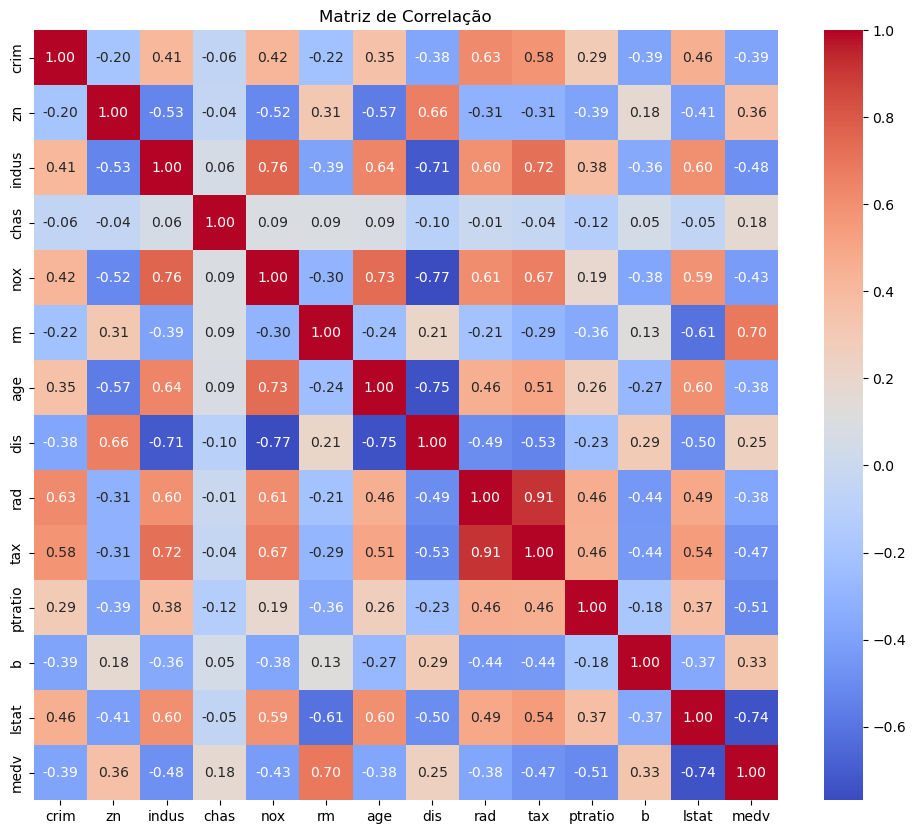

In [23]:
correlation_matrix = boston.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

### 3. Separe os dados em validação e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nConjuntos de treino e teste criados:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [25]:
tree_regressor_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_regressor_8.fit(X_train, y_train)

tree_regressor_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_regressor_2.fit(X_train, y_train)

train_score_8 = tree_regressor_8.score(X_train, y_train)
test_score_8 = tree_regressor_8.score(X_test, y_test)

train_score_2 = tree_regressor_2.score(X_train, y_train)
test_score_2 = tree_regressor_2.score(X_test, y_test)

print(f"Profundidade 8 - R2 treino: {train_score_8:.2f}, R2 teste: {test_score_8:.2f}")
print(f"Profundidade 2 - R2 treino: {train_score_2:.2f}, R2 teste: {test_score_2:.2f}")

Profundidade 8 - R2 treino: 0.98, R2 teste: 0.88
Profundidade 2 - R2 treino: 0.70, R2 teste: 0.65


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [31]:
from sklearn.metrics import mean_squared_error
y_train_pred_8 = tree_regressor_8.predict(X_train)
y_test_pred_8 = tree_regressor_8.predict(X_test)

y_train_pred_2 = tree_regressor_2.predict(X_train)
y_test_pred_2 = tree_regressor_2.predict(X_test)

mse_train_8 = mean_squared_error(y_train, y_train_pred_8)
mse_test_8 = mean_squared_error(y_test, y_test_pred_8)
mse_train_2 = mean_squared_error(y_train, y_train_pred_2)
mse_test_2 = mean_squared_error(y_test, y_test_pred_2)

print(f"Profundidade 8 - MSE treino: {mse_train_8:.2f}, MSE teste: {mse_test_8:.2f}")
print(f"Profundidade 2 - MSE treino: {mse_train_2:.2f}, MSE teste: {mse_test_2:.2f}")

Profundidade 8 - MSE treino: 1.95, MSE teste: 8.98
Profundidade 2 - MSE treino: 25.65, MSE teste: 25.99


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [ ]:
#Temos a 8 com resultado melhor

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

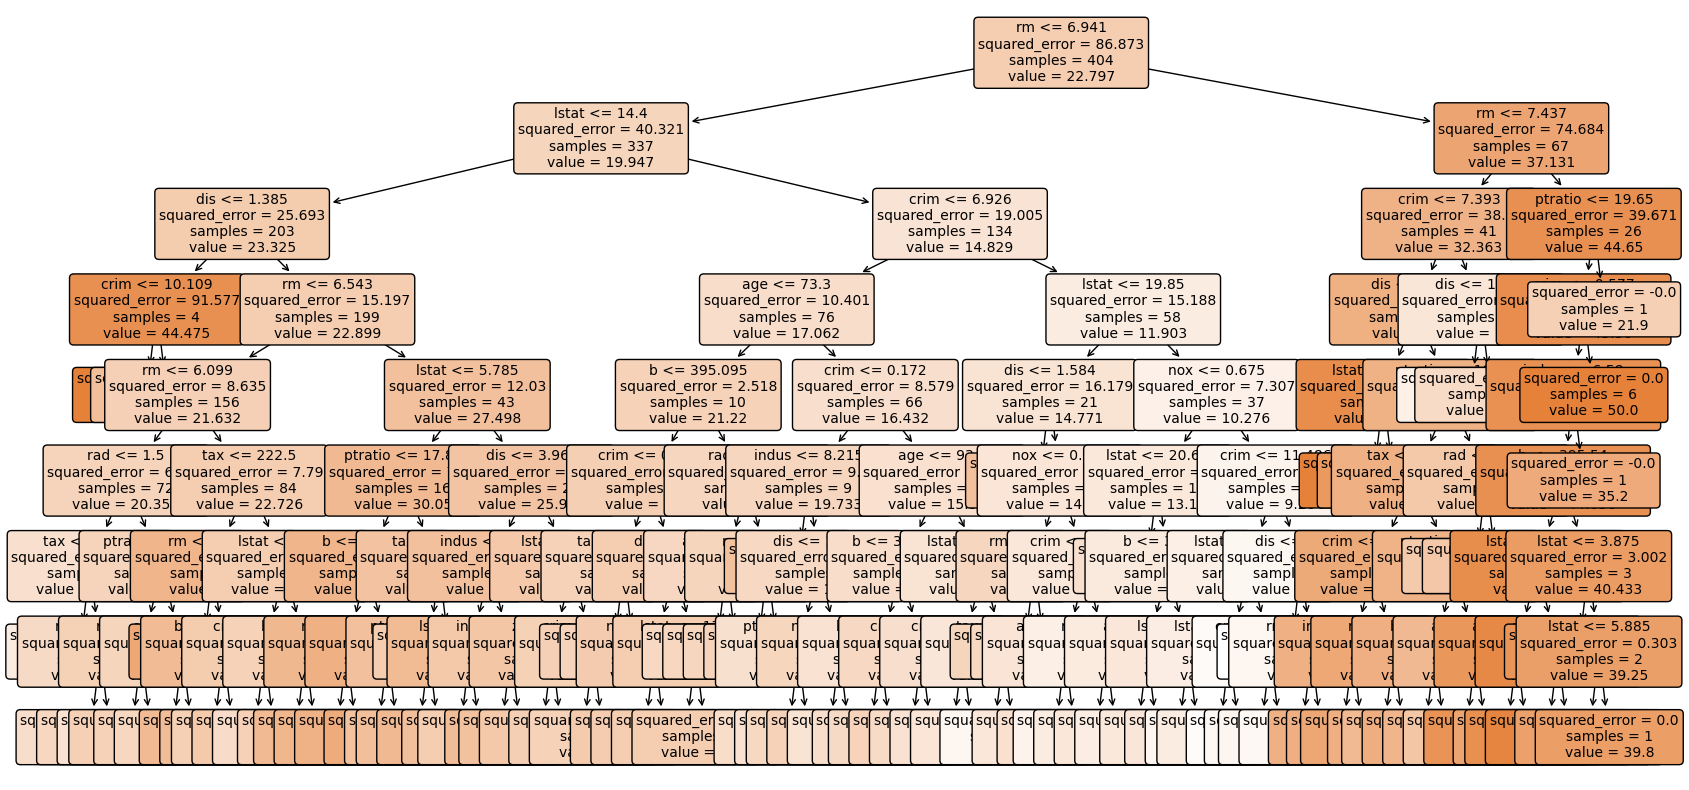

In [38]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(tree_regressor_8, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.show()